<a href="https://colab.research.google.com/github/kencbaron/BEAM-Data-Science-Fall-2019/blob/master/Lesson5and6v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Review of Correlation and Introduction to Linear Regression</h1>

<h2>Key Concepts</h2>

- Reivew of Correlation
- Fit a linear model
- Studying the World Happiness Data Set


<h2> Shout Outs to Colleagues </h2>

Harold F and Peter T. And Aditi K, Greg S, Jinger Z, Steven K, and Xufei W



<h2>Loading Statistics Packages </h2>

First, we will load some helpful Python statistics packages:

- Pandas is a general purpose package for data analysis, particularly datasets that are measured over time (*pan*el *da*taset*s*)
- Numpy is a package for easily manipulating matrices and includes some basic multivariate statistics and linear algebra functions
- Matplotlib is a package for plotting data


In [0]:
import pandas as pd # loading Pandas, a module for data analysis
import numpy as np # loading Numpy, a module for matrices and linear algebra
import matplotlib.pyplot as plt # loading matplotlib.pyplot, a module useful for interactiveplotting
import warnings; warnings.simplefilter('ignore')  # suppressing warnings 

##### 6 graphs of positive correlation

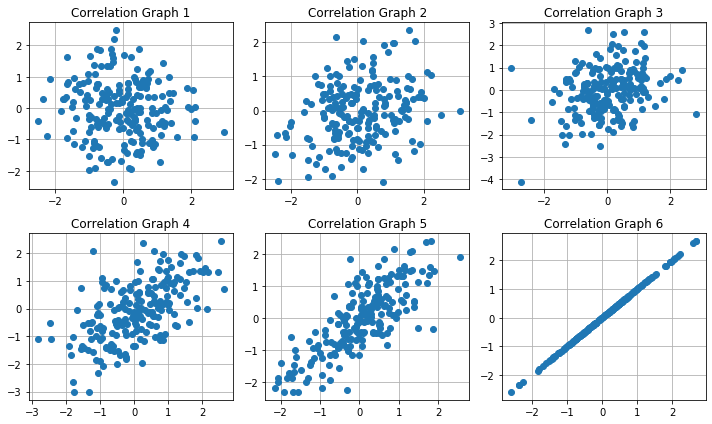

In [74]:
import warnings; warnings.simplefilter('ignore')
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    test_data = np.random.multivariate_normal([0, 0], [[1, i / 5.0], [i / 5.0, 1]], 200) # first is the mean, second is covariance, third is the size
    plt.plot(test_data[:,0], test_data[:,1], "o")
    plt.title("Correlation Graph {}".format(i+1))
    plt.grid()
    
plt.tight_layout()

##### 6 graphs of negative correlation

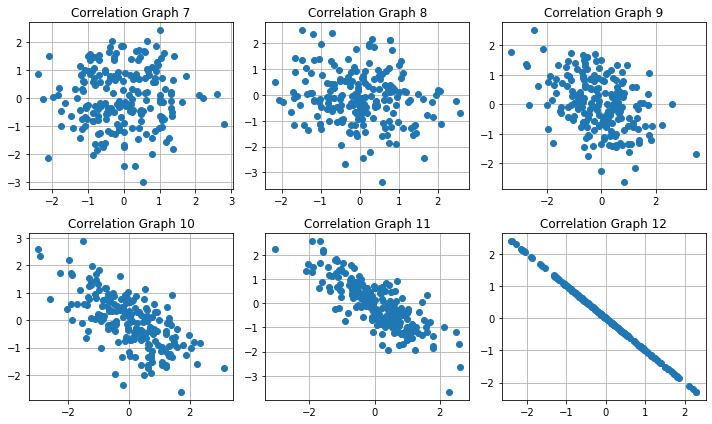

In [75]:
import warnings; warnings.simplefilter('ignore')
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    test_data = np.random.multivariate_normal([0, 0], [[1, -i / 5.0], [-i / 5.0, 1]], 200) # first is the mean, second is covariance, third is the size
    plt.plot(test_data[:,0], test_data[:,1], "o")
    plt.title("Correlation Graph {}".format(i+7))
    plt.grid()
    
plt.tight_layout()

##### 6 graphs of random correlation

In [89]:
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(3)
# generate random numbers between -1 and -1
randomvalues = 2*rand(6)-1
print(randomvalues)

[ 0.10159581  0.41629565 -0.41819052  0.02165521  0.78589391  0.79258618]


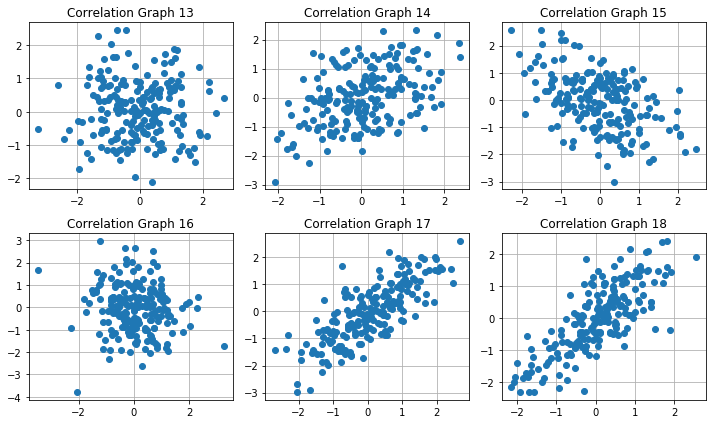

In [91]:
import warnings; warnings.simplefilter('ignore')
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    test_data = np.random.multivariate_normal([0, 0], [[1, randomvalues[i]], [randomvalues[i], 1]], 200) # first is the mean, second is covariance, third is the size
    plt.plot(test_data[:,0], test_data[:,1], "o")
    plt.title("Correlation Graph {}".format(i+13))
    plt.grid()
plt.tight_layout()

Anscombe's quartet: Given the data below, can you create a scatter plot of the data and compute correlations for each pair?

In [0]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

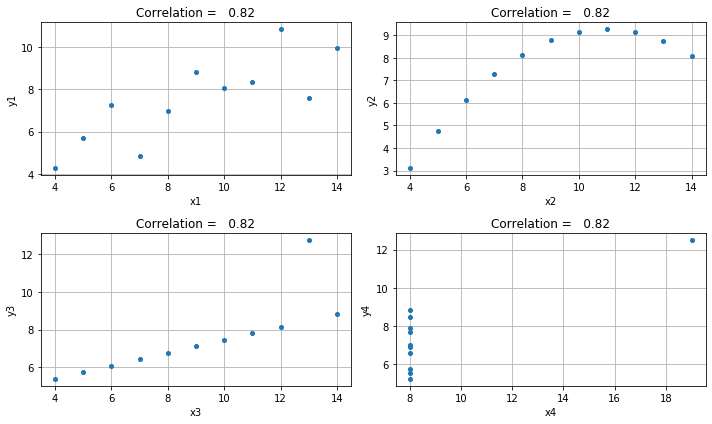

In [112]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(eval("x" + str(i+1)), eval("y" + str(i+1)), "o", markersize=4)
    plt.xlabel("x" + str(i+1))
    plt.ylabel("y" + str(i+1))
    plt.title("Correlation = {:6.2f}".format(np.corrcoef(eval("x" + str(i+1)), eval("y" + str(i+1)))[0,1]))
    plt.grid()
plt.tight_layout()

Correlation is NOT Causation

"Correlation is not causation" is a statistics mantra. Correlation is a measure of how closely related two things are. Think of it as a number describing the relative change in one thing when there is a change in the other, with 1 being a strong positive relationship between two sets of numbers, –1 being a strong negative relationship and 0 being no relationship whatsoever.

"Correlation is not causation" means that just because two things correlate does not necessarily mean that one causes the other. Above you saw correlation between 'Social Support' and 'Life Ladder' is same as the correlation between 'Life Ladder' and 'Social Support'.

We can not conclude from this number what parameter 'causes' the other.

XKCD Comic on Correlation and Causation

To establish causation, we often do an experiment where we split a population into two random groups, a control and an experimental group. In testing a new medicine, one group might receive a placedo and then the other group would get a medicine. Comparing the health of the two groups can lead to a statement about causation about the new medicine.

In [0]:
data_all = pd.read_csv("BEAM-Data-Science-Fall-2019/datasets/world_happiness_report_2018.csv") # reading our csv dataset into the variable name data_all # using Pandas to load data


In [0]:
data_all = data_all.dropna() # removing NAs or missing values


In [109]:
data_all.head() # the head command shows us the first few rows (5 rows by default) in a data set

,year,country,Life Ladder,GDP per capita,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,2008,Afghanistan,3.723590,1298.143187,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,2009,Afghanistan,4.401778,1531.173670,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,2010,Afghanistan,4.758381,1614.254676,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,2011,Afghanistan,3.831719,1660.739990,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,2012,Afghanistan,3.782938,1839.273771,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367


An obvious hypothesis to test is whether or not more developed countries have higher levels of happiness. In other words, does higher GDP suggest higher Life Ladder score. We first plot the data to see if there is a relationship between the two variables.

In [100]:
plt.figure(figsize=(10, 6)) # setting the visual size of our plot


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [0]:
data = data_all[data_all['year'] == 2016] # 2016 is the most recent year that we have data available for 


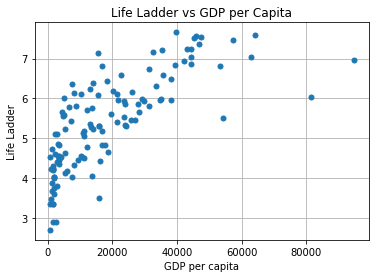

In [101]:
plt.plot(data["GDP per capita"], data["Life Ladder"], "o", markersize=5) # marking data points with "o's"
plt.xlabel("GDP per capita") # labeling x axis
plt.ylabel("Life Ladder") # labeling y axis
plt.title("Life Ladder vs GDP per Capita") # creating the title
plt.grid()

##### Let's log transform GDP per capita and see if any pattern emmerges 

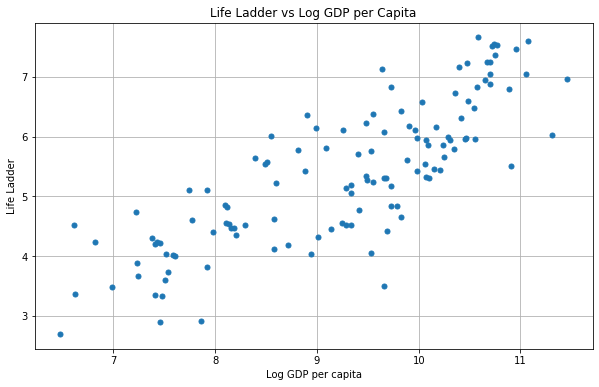

In [104]:
plt.figure(figsize=(10, 6)) # figure size 
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=5) # plotting two variables
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder vs Log GDP per Capita")
plt.grid()

<div style="border: 3px solid green; padding: 10px">
 <b> Example 2: </b> Compute the correlation between the 'Log GDP per capita and Life Ladder' of a country. 
</div>

<h2>Fit a Linear Model</h2>

Our goal in this section is to find a linear model between Log GDP per capita and Life Ladder.  The linear model has the form

$$ \mathrm{LifeLadder} = a \cdot \mathrm{LogGDPPerCapita} + b $$

We call $a$ the <b>slope</b> and $b$ the <b>intercept</b>.  The animation below shows different linear models superimposed on the data.

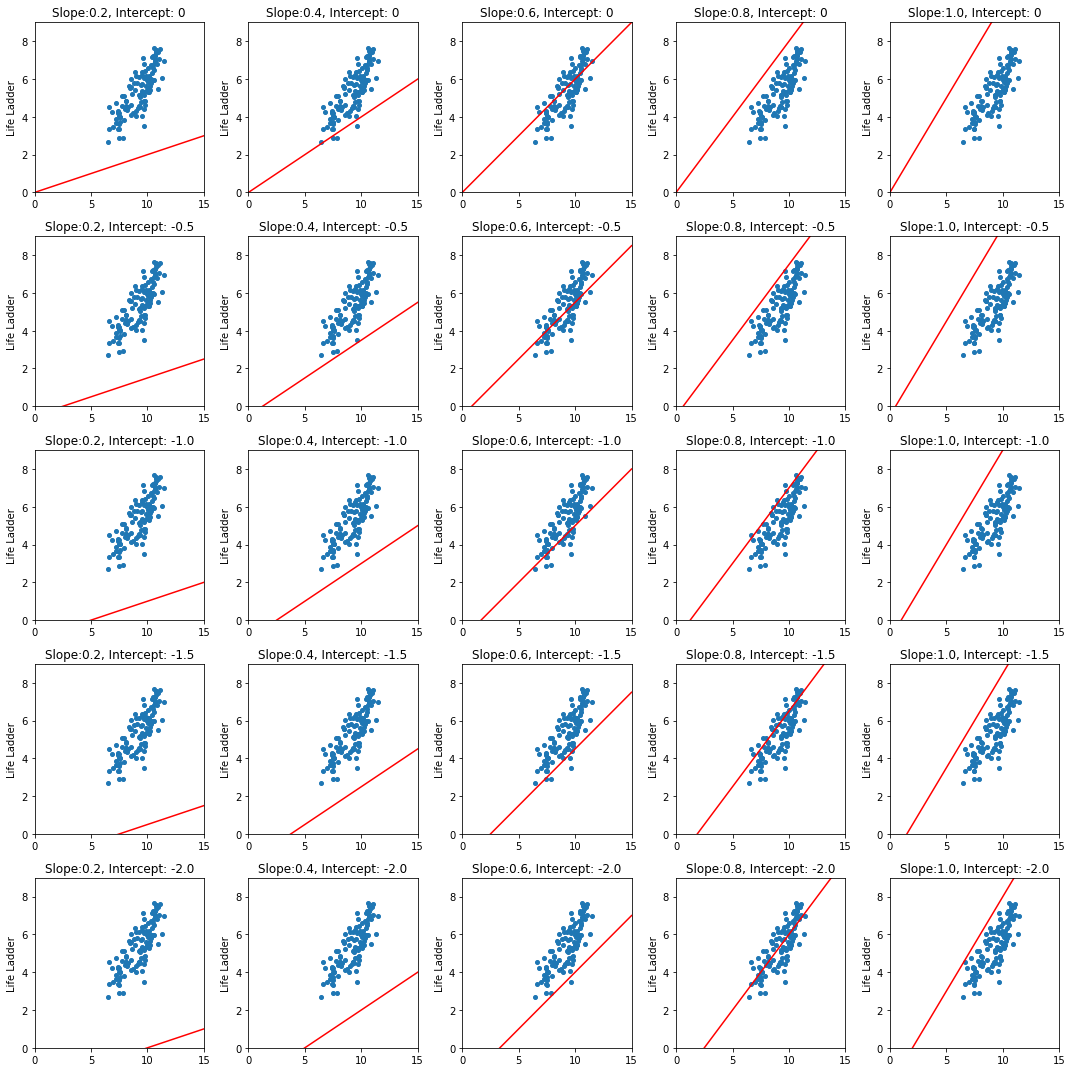

In [95]:
fig = plt.figure(figsize=(15, 15))
plt.ion()
plt.grid()

xvals = np.arange( data["Log GDP per capita"].max() + 4)
for i in range(5):
    for s in range(1, 6):
        plt.subplot(5, 5, i*5+s)
        plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
        plt.ylabel("Life Ladder")
        plt.xlim(0,15)
        plt.ylim(0, 9)
        intercept = -0.5 * i if i !=0 else 0
        slope = .2 * s 
        plt.title("Slope:" + str(np.round(slope,1)) + ", Intercept: " + str(np.round(intercept,1)))
        yvals = slope * xvals + intercept
        line = plt.plot(xvals, yvals, color="r")
        fig.canvas.draw()
plt.tight_layout()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 4:</b> Guess the slope and intercept of this linear model, without using a computer.  No cheating! Plot the line in together with the scatter plot
</div>

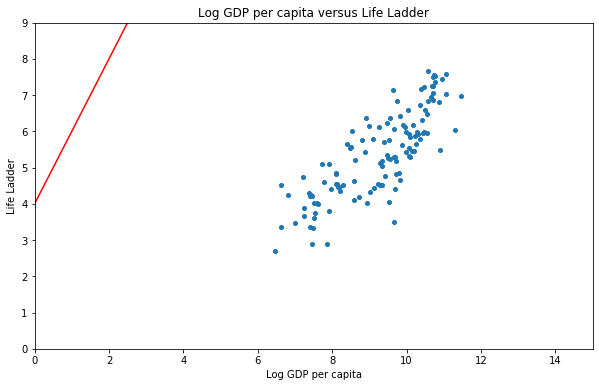

In [115]:
SLOPE = 2
INTERCEPT = 4

fig = plt.figure(figsize=(10, 6))
plt.ion()
plt.grid()

plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Log GDP per capita versus Life Ladder")
plt.xlim(0,15)
plt.ylim(0, 9)
plt.grid()

xvals = np.arange(data["Log GDP per capita"].max() + 4) 
yvals = SLOPE * xvals + INTERCEPT
line = plt.plot(xvals, yvals, color="r")

To fit the linear model, we need to define a <b>loss function,</b> which tells us how much to penalize "errors", or deviations between the actual and fitted values.  The loss function tells us how well the model fits our data.

The sum of squared errors is a popular loss function:

$$ \mathrm{loss} = \sum_{i=1}^N (y_i - a x_i - b)^2 $$

This loss function is popular for many reasons, one of which is its <b>tractability</b>.  In other words, it's easy to write down a closed-form expression for $a$ and $b$ so that we can compute them right away without ever needing to actually evaluate the loss function.

The animation below shows what the loss function looks like for various linear models.

In [0]:
def loss(x, y, slope, intercept):
    predictions = x * slope + intercept
    errors = y - predictions
    return np.sum(errors ** 2)

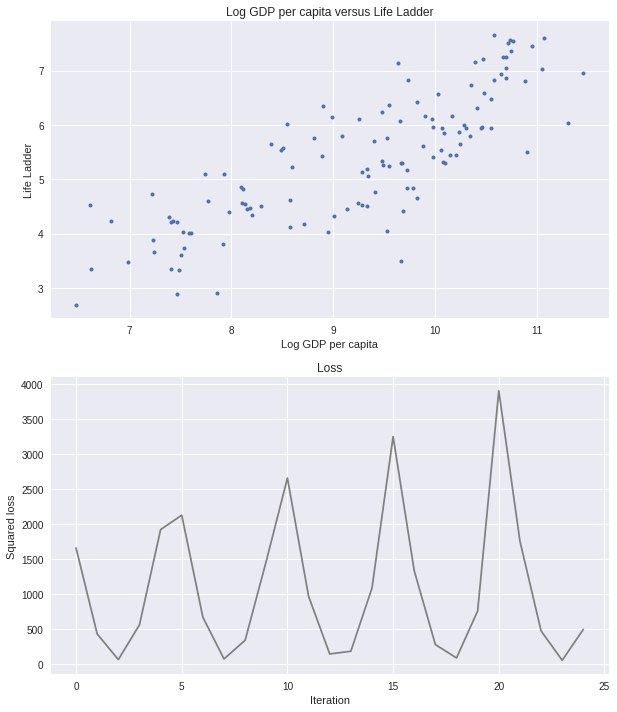

In [0]:
fig = plt.figure(figsize=(10, 12))
plt.ion()

losses = np.zeros(25)
counter = 0

xvals = np.arange(data['Log GDP per capita'].max())

plt.subplot(2, 1, 1)
plt.grid()
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Log GDP per capita versus Life Ladder")
plt.grid()

for i in range(5):
    for s in range(1, 6):
        intercept = -0.5 * i if i !=0 else 0
        slope = .2 * s 
        yvals = slope * xvals + intercept
        loss_value = loss(data["Log GDP per capita"], data["Life Ladder"], slope, intercept)
        losses[counter] = loss_value        
        counter += 1
        
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(losses)), losses, color ='0.5')
plt.xlabel("Iteration")
plt.ylabel("Squared loss")
plt.title("Loss")
fig.canvas.draw()



<div style="border: 3px solid green; padding: 10px">
  <b>Loss Calculation for best iteration:</b> Compute the loss for the parameters you chose earlier
</div>

In [0]:
loss = loss(data['Log GDP per capita'], data['Life Ladder'], ..., ...)
print(loss)

92.90901780905865


By now, we will assume you have figured out the closed-form expressions for $a$ and $b$.  Using some of the quantities we learned about in the previous lectures, there is a nice way to write down these formulas.  The slope works out to be the <b>correlation coefficient</b> of the two variables, times the ratio of the <b>standard deviations</b> of the response and predictor variables:

$$ a = r_{xy} \frac{s_y}{s_x} $$

where

$$ s_x = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2} $$
$$ s_y = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (y_i - \bar{y})^2} $$
$$ r_{xy} = \frac{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{s_x s_y} $$

The intercept is just

$$ b = \bar{y} - a \bar{x} $$.

Now we can finally see what the optimal fit is.

Optimal slope: 0.7861435287365188
Optimal intercept: -1.893938972103494


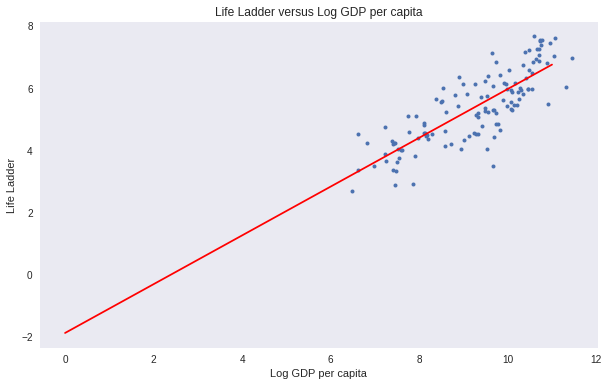

In [0]:
slope_opt = data["Log GDP per capita"].cov(data["Life Ladder"]) / data["Log GDP per capita"].var()
intercept_opt = data["Life Ladder"].mean() - slope_opt * data["Log GDP per capita"].mean()

print("Optimal slope: {}".format(slope_opt))
print("Optimal intercept: {}".format(intercept_opt))

fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder versus Log GDP per capita")
plt.grid()

xvals = np.arange(data['Log GDP per capita'].max())
yvals = slope_opt * xvals + intercept_opt
plt.plot(xvals, yvals, color="r")
fig.canvas.draw()

So every additional 0.786 in Log GDP per capita (Almost doubling the GDP) increases the life ladder by 1 point.

<h2>Check the Goodness of Fit</h2>

Now that we have our linear model, how do we tell if it's any good?  While we computed the slope and intercept by hand above, let's try doing this within the Python package statsmodels, which will give us a few extra things for free:

In [0]:
import statsmodels.api as sm
data["Constant"] = 1
m = sm.OLS(data["Life Ladder"], data[["Log GDP per capita", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           2.28e-30
Time:                        14:46:38   Log-Likelihood:                -129.99
No. Observations:                 124   AIC:                             264.0
Df Residuals:                     122   BIC:                             269.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Log GDP per capita     0.7861      0.051     15.392      0.000       0.685       0.887
Constant              -1.8939      0.476     -3.977      0.000      -2.837      -0.951
==============================================================================
Omnibus:                        1.306   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.379
Skew:                          -0.231   Prob(JB):                        0.502
Kurtosis:                       2.769   Cond. No.                         71.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While there are lots of numbers here, a few confirm what we could probably tell from linear inspection: overall, this is a good model:

- The <b>R-squared</b>, which is the squared correlation coefficient, is 66.0%, which is pretty good for a linear model.  Just how good is given by the <b>F-statistic</b>, which roughly tells us how implausible it would be to see such a high correlation between the Log GDP per capita and Life Ladder that we happen to have here, under the assumption that there is actually no correlation between the two.  The actual probability is given by the <b>P-value</b> of the F-statistic, which is less than $10^{-29}$.  This means the probability of seeing a relationship this strong if in truth one did not exist is less than the probability that you could pick one atom out of all of the atoms in the universe.
- While the R-squared gives an idea of how good the overall linear model is, we can look at the next table to see how much the Log GDP per capita and the intercept (constant) contribute to the model.  For example, maybe we don't need to bother with a constant term at all and just looking at the $a \cdot \mathrm{(Log\ GDP\ per\ capita)}$ part of the model would be good enough.  However, the p-values on both of these variables are quite small, which tells us that both pieces of the model have a statistically significant contribution.

<div style="border: 3px solid green; padding: 10px">
  <b>Null Hypothesis (H0): There is no relation between Log GDP per capita and Life Ladder</b><br> Based on the output above, would you accept or reject the null hypothesis that higher Log GDP indicates higher Life ladder (happiness)
</div>

#### Linear Model Assumptions and Residual Analysis



The linear model makes two critical assumptions (there are others, but these are two of the most important):

- <b>Homoskedasticity</b>: This is a fancy way of saying that the variance of the errors is the same no matter what the value of the predictor variable is.  In other words, the predicted range of Life Ladder is about as wide a country with 100 GDP or a country with 10,000 GDP.
- <b>Independence of errors</b>: This means that knowing how much the model gets Life Ladder of one country wrong shouldn't tell us anything about how much the model gets wrong the Life Ladder of other countries.

Both of these assumptions are quite strong and **rarely hold in practice**: the goal is more to make sure they hold reasonably well.  Let's look at the residuals to see how well they hold:

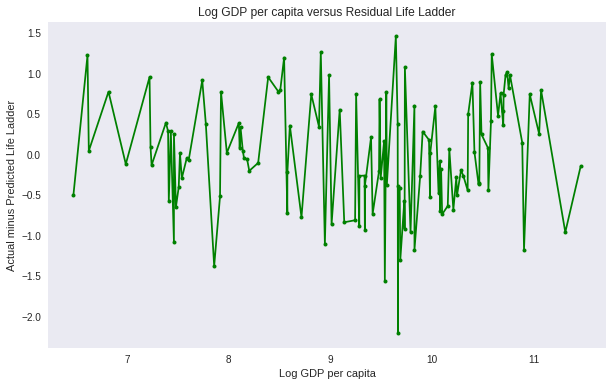

In [0]:
data["Residual"] = m.resid
data.sort_values('Log GDP per capita', inplace=True)
fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Residual"], "go-", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Actual minus Predicted Life Ladder")
plt.title("Log GDP per capita versus Residual Life Ladder")
plt.grid()

**Main Excercise 1.1:** Find the factor that describes happiness the best

**Main Exercise 1.2:** Find the factor that explains residualised happiness (post first factor)

**Main Excercise 2.1:** Which country has seen highest change in happiness among countries with full history?

In [0]:
# Get countries with full history of 11 years
total_years_for_country = data_all.groupby('country').apply(lambda x: len(x))
countries_with_complete_history = total_years_for_country.loc[total_years_for_country == 11].index

# Calculate change in Life Ladder between 2006 and 2016 for the above countries
data['Change in Life Ladder'] = np.nan
for country in countries_with_complete_history:
  data.loc[data['country'] == country, 'Change in Life Ladder'] = data.loc[data['country'] == country, 'Life Ladder'].values[0] - data_all.loc[(data_all['country'] == country) & (data_all['year'] == 2006), 'Life Ladder'].values[0]

data_diff = data.dropna(subset=['Change in Life Ladder'], axis=0)

**Main Excercise 2.2:** Which factor best explains the change in happiness?